# Beat detection
In this tutorial we will learn how to detect beats in ECG, PPG and BP signals.

Our **objectives** are to:
- Use beat detection algorithms to detect beats in ECG, PPG and BP signals
- Compare the performance of different algorithms
- Be aware of pre-processing steps required for real-world data

<div class="alert alert-block alert-warning"><p><b>Context:</b> A key step in analysing PPG and BP signals is the detection of beats in the signals. This allows individual pulse waves to be analysed, and either: (i) features to be extracted from PPG pulse waves; or (ii) reference BP values to be extracted from BP pulse waves.</p></div>

---
## Setup

_These steps have been covered in previous tutorials, so we'll just re-use the code here._

In [1]:
# Packages
import sys
#from pathlib import Path
!pip install wfdb==4.1.0
import wfdb

In [3]:
# The name of the MIMIC IV Waveform Database on PhysioNet
database_name = 'mimic4wdb/0.1.0' 

# Segment for analysis
segment_names = ['83404654_0005', '82924339_0007', '84248019_0005', '82439920_0004', '82800131_0002', '84304393_0001', '89464742_0001', '88958796_0004', '88995377_0001', '85230771_0004', '86643930_0004', '81250824_0005', '87706224_0003', '83058614_0005', '82803505_0017', '88574629_0001', '87867111_0012', '84560969_0001', '87562386_0001', '88685937_0001', '86120311_0001', '89866183_0014', '89068160_0002', '86380383_0001', '85078610_0008', '87702634_0007', '84686667_0002', '84802706_0002', '81811182_0004', '84421559_0005', '88221516_0007', '80057524_0005', '84209926_0018', '83959636_0010', '89989722_0016', '89225487_0007', '84391267_0001', '80889556_0002', '85250558_0011', '84567505_0005', '85814172_0007', '88884866_0005', '80497954_0012', '80666640_0014', '84939605_0004', '82141753_0018', '86874920_0014', '84505262_0010', '86288257_0001', '89699401_0001', '88537698_0013', '83958172_0001']
segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654', 'mimic4wdb/0.1.0/waves/p101/p10126957/82924339', 'mimic4wdb/0.1.0/waves/p102/p10209410/84248019', 'mimic4wdb/0.1.0/waves/p109/p10952189/82439920', 'mimic4wdb/0.1.0/waves/p111/p11109975/82800131', 'mimic4wdb/0.1.0/waves/p113/p11392990/84304393', 'mimic4wdb/0.1.0/waves/p121/p12168037/89464742', 'mimic4wdb/0.1.0/waves/p121/p12173569/88958796', 'mimic4wdb/0.1.0/waves/p121/p12188288/88995377', 'mimic4wdb/0.1.0/waves/p128/p12872596/85230771', 'mimic4wdb/0.1.0/waves/p129/p12933208/86643930', 'mimic4wdb/0.1.0/waves/p130/p13016481/81250824', 'mimic4wdb/0.1.0/waves/p132/p13240081/87706224', 'mimic4wdb/0.1.0/waves/p136/p13624686/83058614', 'mimic4wdb/0.1.0/waves/p137/p13791821/82803505', 'mimic4wdb/0.1.0/waves/p141/p14191565/88574629', 'mimic4wdb/0.1.0/waves/p142/p14285792/87867111', 'mimic4wdb/0.1.0/waves/p143/p14356077/84560969', 'mimic4wdb/0.1.0/waves/p143/p14363499/87562386', 'mimic4wdb/0.1.0/waves/p146/p14695840/88685937', 'mimic4wdb/0.1.0/waves/p149/p14931547/86120311', 'mimic4wdb/0.1.0/waves/p151/p15174162/89866183', 'mimic4wdb/0.1.0/waves/p153/p15312343/89068160', 'mimic4wdb/0.1.0/waves/p153/p15342703/86380383', 'mimic4wdb/0.1.0/waves/p155/p15552902/85078610', 'mimic4wdb/0.1.0/waves/p156/p15649186/87702634', 'mimic4wdb/0.1.0/waves/p158/p15857793/84686667', 'mimic4wdb/0.1.0/waves/p158/p15865327/84802706', 'mimic4wdb/0.1.0/waves/p158/p15896656/81811182', 'mimic4wdb/0.1.0/waves/p159/p15920699/84421559', 'mimic4wdb/0.1.0/waves/p160/p16034243/88221516', 'mimic4wdb/0.1.0/waves/p165/p16566444/80057524', 'mimic4wdb/0.1.0/waves/p166/p16644640/84209926', 'mimic4wdb/0.1.0/waves/p167/p16709726/83959636', 'mimic4wdb/0.1.0/waves/p167/p16715341/89989722', 'mimic4wdb/0.1.0/waves/p168/p16818396/89225487', 'mimic4wdb/0.1.0/waves/p170/p17032851/84391267', 'mimic4wdb/0.1.0/waves/p172/p17229504/80889556', 'mimic4wdb/0.1.0/waves/p173/p17301721/85250558', 'mimic4wdb/0.1.0/waves/p173/p17325001/84567505', 'mimic4wdb/0.1.0/waves/p174/p17490822/85814172', 'mimic4wdb/0.1.0/waves/p177/p17738824/88884866', 'mimic4wdb/0.1.0/waves/p177/p17744715/80497954', 'mimic4wdb/0.1.0/waves/p179/p17957832/80666640', 'mimic4wdb/0.1.0/waves/p180/p18080257/84939605', 'mimic4wdb/0.1.0/waves/p181/p18109577/82141753', 'mimic4wdb/0.1.0/waves/p183/p18324626/86874920', 'mimic4wdb/0.1.0/waves/p187/p18742074/84505262', 'mimic4wdb/0.1.0/waves/p188/p18824975/86288257', 'mimic4wdb/0.1.0/waves/p191/p19126489/89699401', 'mimic4wdb/0.1.0/waves/p193/p19313794/88537698', 'mimic4wdb/0.1.0/waves/p196/p19619764/83958172']

# 3 and 8 are helpful examples
rel_segment_no = 8 
rel_segment_name = segment_names[rel_segment_no]
rel_segment_dir = segment_dirs[rel_segment_no]

---
## Extract one minute of signals from this segment

_These steps have been covered in previous tutorials, so we'll just re-use the code here._

In [4]:
# time since the start of the segment at which to begin extracting data
start_seconds = 100 
no_seconds_to_load = 60

segment_metadata = wfdb.rdheader(record_name=rel_segment_name, pn_dir=rel_segment_dir) 
print(f"Metadata loaded from segment: {rel_segment_name}")

fs = round(segment_metadata.fs)
sampfrom = fs*start_seconds
sampto = fs*(start_seconds+no_seconds_to_load)

segment_data = wfdb.rdrecord(record_name=rel_segment_name,
                             sampfrom=sampfrom,
                             sampto=sampto,
                             pn_dir=rel_segment_dir)

print(f"{no_seconds_to_load} seconds of data extracted from: {rel_segment_name}")
abp_col = []
ppg_col = []

abp_col = segment_data.sig_name.index('ABP')
ppg_col = segment_data.sig_name.index('Pleth')
ecg_col = segment_data.sig_name.index('II')

abp = segment_data.p_signal[:,abp_col]
ppg = segment_data.p_signal[:,ppg_col]
ecg = segment_data.p_signal[:,ecg_col]
fs = segment_data.fs

print(f"Extracted the ABP signal from column {abp_col} of the matrix of waveform data at {fs:.1f} Hz.")
print(f"Extracted the PPG signal from column {ppg_col} of the matrix of waveform data at {fs:.1f} Hz.")
print(f"Extracted the ECG signal from column {ecg_col} of the matrix of waveform data at {fs:.1f} Hz.")

Metadata loaded from segment: 88995377_0001
60 seconds of data extracted from: 88995377_0001
Extracted the ABP signal from column 3 of the matrix of waveform data at 62.5 Hz.
Extracted the PPG signal from column 4 of the matrix of waveform data at 62.5 Hz.
Extracted the ECG signal from column 2 of the matrix of waveform data at 62.5 Hz.


---
## Filter the signals

_These steps have been covered in previous tutorials, so we'll just re-use the code here._

- Import packages

In [5]:
import scipy.signal as sp
from matplotlib import pyplot as plt
import numpy as np

- Create filter for PPG and BP

In [6]:
# filter cut-offs for PPG and BP
lpf_cutoff = 0.7 # Hz
hpf_cutoff = 10 # Hz

# create filter
sos_filter = sp.butter(10, [lpf_cutoff, hpf_cutoff],
                       btype = 'bp',
                       analog = False,
                       output = 'sos',
                       fs = fs)

- Filter PPG and BP

In [8]:
# filter PPG
ppg_filt = sp.sosfiltfilt(sos_filter, ppg)

# Filter BP
abp_filt = sp.sosfiltfilt(sos_filter, abp)

- Plot the results

Text(0, 0.5, 'PPG')

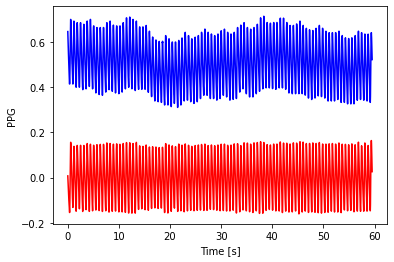

In [9]:
t = np.arange(0,len(ppg))/fs
fig, ax = plt.subplots()
ax.plot(t, ppg, color = 'blue')
ax.plot(t, ppg_filt, color = 'red')
ax.set_xlabel('Time [s]')
ax.set_ylabel('PPG')

- Create filter for ECG

In [10]:
# filter cut-offs for PPG and BP
lpf_cutoff = 0.5 # Hz
hpf_cutoff = 30 # Hz

# create filter
sos_filter = sp.butter(10, [lpf_cutoff, hpf_cutoff],
                       btype = 'bp',
                       analog = False,
                       output = 'sos',
                       fs = fs)

- Filter ECG

In [11]:
ecg_filt = sp.sosfiltfilt(sos_filter, ecg)

- Plot the results

Text(0, 0.5, 'Amplitude [V]')

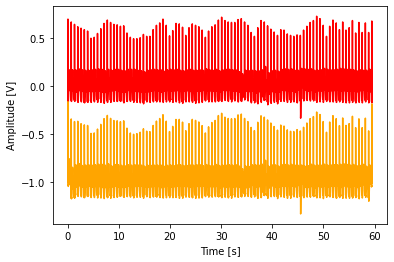

In [12]:
t = np.arange(0,len(ecg))/fs
fig, ax = plt.subplots()
ax.plot(t, ecg, color = 'red')
ax.plot(t, ecg_filt-1, color = 'orange')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [V]')

---
## Beat detection for pulsatile signals

### Setup

- Import the functions required to detect beats by running the cell containing the required functions [below](#functions).

<div class="alert alert-block alert-info"><p><b>Question:</b> How have these functions been stored?</p></div>

### Detect beats in the PPG signal

- Detect beats in the PPG signal using three beat detector algorithms:

In [119]:
def pulse_detect(*args, **kwargs):
    """
    Placeholder for a pulse detection function.
    """
    msg = """Override the pulse_detect function with the example 
          provided at the bottom of this notebook.\n"""
    print(msg)
    return None

In [14]:
ppg_ibis_d2max = pulse_detect(ppg_filt, fs, 5, 'd2max')
print(f"Detected {len(ppg_ibis_d2max)} beats in the PPG signal using the {'D2max'} algorithm")

ppg_ibis_upslopes = pulse_detect(ppg_filt, fs, 5,'upslopes')
print(f"Detected {len(ppg_ibis_upslopes)} beats in the PPG signal using the {'Upslopes'} algorithm")

ppg_ibis_delineator = pulse_detect(ppg_filt, fs, 5, 'delineator')
print(f"Detected {len(ppg_ibis_delineator)} beats in the PPG signal using the {'Delineator'} algorithm")

#ppg_ibis_qppg = pulse_detect(ppg_filt, fs, 10, 'qppg')
#print(f"Detected {len(ppg_ibis_qppg)} beats in the PPG signal using the {'qppg'} algorithm")

ppg_ibis_bishop = pulse_detect(ppg_filt, fs, 5, 'bishop')
print(f"Detected {len(ppg_ibis_bishop)} beats in the PPG signal using the {'bishop'} algorithm")

Detected 82 beats in the PPG signal using the D2max algorithm
Detected 82 beats in the PPG signal using the Upslopes algorithm
Detected 82 beats in the PPG signal using the Delineator algorithm
Detected 82 beats in the PPG signal using the bishop algorithm


- Plot the results:

Text(0.5, 1.0, 'Bishop')

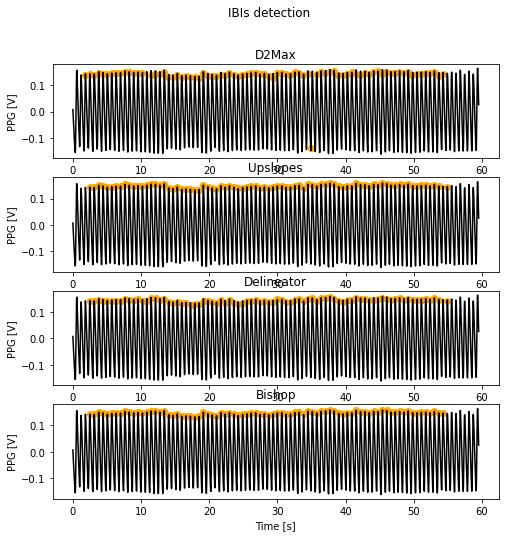

In [15]:
from matplotlib import pyplot as plt

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1,
                                  sharex = False,
                                  sharey = False,
                                  figsize = (8,8))
fig.suptitle('IBIs detection') 

t = np.arange(0, len(ppg_filt)/fs,1.0/fs)

ax1.plot(t, ppg_filt, color = 'black')
ax1.scatter(t[0] + ppg_ibis_d2max/fs,
            ppg_filt[ppg_ibis_d2max],
            color = 'orange',
            marker = 'o')
ax1.set_ylabel('PPG [V]')
ax1.set_title('D2Max')

ax2.plot(t, ppg_filt, color = 'black')
ax2.scatter(t[0] + ppg_ibis_upslopes/fs,
            ppg_filt[ppg_ibis_upslopes],
            color = 'orange',
            marker = 'o')
ax2.set_ylabel('PPG [V]')
ax2.set_title('Upslopes')

ax3.plot(t, ppg_filt, color = 'black')
ax3.scatter(t[0] + ppg_ibis_delineator/fs,
            ppg_filt[ppg_ibis_delineator],
            color = 'orange',
            marker = 'o')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('PPG [V]')
ax3.set_title('Delineator')

ax4.plot(t, ppg_filt, color = 'black')
ax4.scatter(t[0] + ppg_ibis_bishop/fs,
            ppg_filt[ppg_ibis_bishop],
            color = 'orange',
            marker = 'o')
ax4.set_xlabel('Time [s]')
ax4.set_ylabel('PPG [V]')
ax4.set_title('Bishop')

We'll use the 'Bishop' algorithm in the rest of this tutorial

<div class="alert alert-block alert-info"><p><b>Task:</b> Try repeating this for 'rel_segment_no = 3' How do the beat detectors perform on this patient's data?</p></div>

### Detect beats in the BP signal

Detected 82 beats in the BP signal using the bishop algorithm


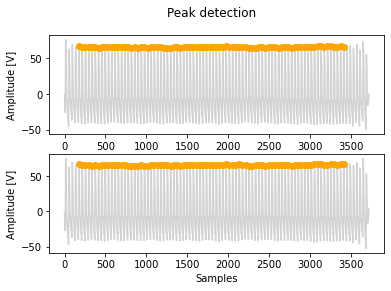

In [16]:
abp_ibis = pulse_detect(abp_filt,fs,5,'bishop', vis=True)
print("Detected {} beats in the BP signal using the {} algorithm".format(len(abp_ibis), "bishop"))

### Detecting beats in BP and PPG signals using Neurokit

We could also use a Python toolbox to detect beats in BP and PPG signals. Neurokit provides a helpful starting point.

In [30]:
import neurokit2 as nk

# PPG
pks = nk.ppg_findpeaks(ppg_filt, sampling_rate=62.5)
ppg_ibis = pks['PPG_Peaks']
print("Detected {} beats in the PPG signal".format(len(ppg_ibis)))

# BP
pks = nk.ppg_findpeaks(abp_filt, sampling_rate=62.5)
abp_ibis = pks['PPG_Peaks']
print("Detected {} beats in the BP signal".format(len(abp_ibis)))

Detected 93 beats in the PPG signal
Detected 92 beats in the BP signal


### Detect beats in the ECG signal

In [17]:
# based on: https://neuropsychology.github.io/NeuroKit/studies/ecg_benchmark.html

import neurokit2 as nk

signals, info = nk.ecg_peaks(ecg_filt, sampling_rate=62.5, correct_artifacts=True)

ecg_ibis = info["ECG_R_Peaks"]

print("Detected {} beats in the ECG signal using the {} algorithm".format(len(ecg_ibis), "neurokit"))

Detected 93 beats in the ECG signal using the neurokit algorithm


/Users/petercharlton/anaconda3/lib/python3.8/site-packages/neurokit2/signal/signal_fixpeaks.py:277: RuntimeWarning: divide by zero encountered in true_divide
  mrrs /= th2
/Users/petercharlton/anaconda3/lib/python3.8/site-packages/neurokit2/signal/signal_fixpeaks.py:277: RuntimeWarning: invalid value encountered in true_divide
  mrrs /= th2


### Plot the results

Text(0, 0.5, 'ECG')

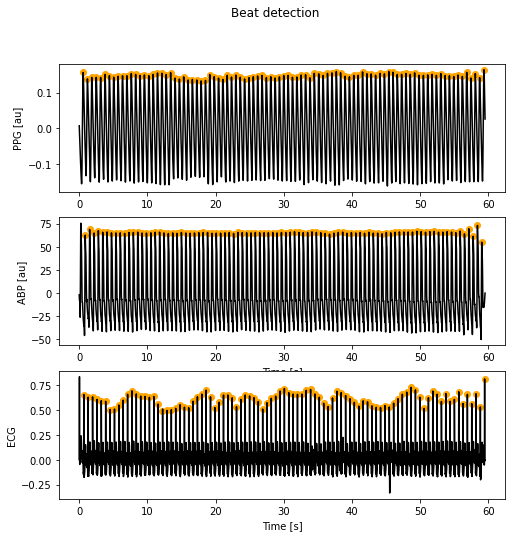

In [33]:
from matplotlib import pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(3, 1,
                              sharex = False,
                              sharey = False,
                              figsize = (8,8))
fig.suptitle('Beat detection') 

t = np.arange(0,len(ppg_filt)/fs,1.0/fs)

ax1.plot(t, ppg_filt, color = 'black')
ax1.scatter(t[0] + ppg_ibis/fs,
            ppg_filt[ppg_ibis],
            color = 'orange',
            marker = 'o')
ax1.set_ylabel('PPG [au]')

ax2.plot(t, abp_filt, color = 'black')
ax2.scatter(t[0] + abp_ibis/fs,
            abp_filt[abp_ibis],
            color = 'orange',
            marker = 'o')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('ABP [au]')

ax3.plot(t, ecg_filt, color = 'black')
ax3.scatter(t[0] + ecg_ibis/fs,
            ecg_filt[ecg_ibis],
            color = 'orange',
            marker = 'o')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('ECG')

---
## Functions

The following functions are required for this tutorial. Run the cell below and then return to the top of the page.

In [13]:
import scipy.signal as sp
import numpy as np
import matplotlib.pyplot as plt

def pulse_detect(x,fs,w,alg,vis = False):
    """
    Description: Pulse detection and correction from pulsatile signals
    Inputs:  x, array with pulsatile signal [user defined units]
             fs, sampling rate of signal [Hz]
             w, window length for analysis [s]
             alg, string with the name of the algorithm to apply ['heartpy','d2max','upslopes','delineator','qppg','bishop']
             vis, visualisation option [True, False]
    Outputs: ibis, location of cardiac cycles as detected by the selected algorithm [number of samples]
    
    Algorithms:       1: HeartPy (van Gent et al, 2019, DOI: 10.1016/j.trf.2019.09.015)
                      2: 2nd derivative maxima (Elgendi et al, 2013, DOI: 10.1371/journal.pone.0076585)
                      3: Systolic upslopes (Arguello Prada and Serna Maldonado, 2018, 
                         DOI: 10.1080/03091902.2019.1572237)
                      4: Delineator (Li et al, 2010, DOI: 10.1109/TBME.2005.855725)
                      5: qppg (Vest et al, 2010, DOI: 10.1088/1361-6579/aae021)
                      6: Bishop (Bishop and Ercole, 2018, DOI: 10.1007/978-3-319-65798-1_39)
    Fiducial points:  1: Systolic peak (pks)
                      2: Onset, as the minimum before the systolic peak (ons)
                      3: Onset, using the tangent intersection method (ti) 
                      4: Diastolic peak (dpk)
                      5: Maximum slope (m1d)
                      6: a point from second derivative PPG (a2d)
                      7: b point from second derivative PPG (b2d)
                      8: c point from second derivative PPG (c2d)
                      9: d point from second derivative PPG (d2d)
                      10: e point from second derivative PPG (e2d)
                      11: p1 from the third derivative PPG (p1)    
                      12: p2 from the third derivative PPG (p2)
    
    Libraries: NumPy (as np), SciPy (Signal, as sp), Matplotlib (PyPlot, as plt)
    
    Version: 1.0 - June 2022
             2.0 - July 2022: Bug corrections
             2.1 - March 2023: Peter Charlton additional beat detectors
    
    Developed by: Elisa Mejía-Mejía
                   City, University of London
    
    """
    
    # Check selected algorithm
    pos_alg = ['heartpy','d2max','upslopes','delineator','qppg','bishop']
    if not(alg in pos_alg):
        print('Unknown algorithm determined. Using D2max as default')
        alg = 'd2max'
    
    # Pre-processing of signal
    x_d = sp.detrend(x)
    sos = sp.butter(10, [0.5, 10], btype = 'bp', analog = False, output = 'sos', fs = fs)
    x_f = sp.sosfiltfilt(sos, x_d)
    
    # Peak detection in windows of length w
    n_int = np.floor(len(x_f)/(w*fs))
    for i in range(int(n_int)):
        start = round(i*fs*w)
        stop = round((i + 1)*fs*w - 1)
        #print('Start: ' + str(start) + ', stop: ' + str(stop))
        aux = x_f[range(start,stop)]
        if alg == 'heartpy':
            locs = heartpy(aux,fs,40,180,5)
        elif alg == 'd2max':
            locs = d2max(aux,fs)
        elif alg == 'upslopes':
            locs = upslopes(aux)
        elif alg == 'delineator':
            locs = delineator(aux,fs)  
        elif alg == 'qppg':
            locs = qppg(aux,fs)      
        elif alg == 'bishop':
            locs = bishop(aux)     
        locs = locs + start
        if i == 0:
            ibis = locs
        else:
            ibis = np.append(ibis,locs)
    if n_int*fs*w != len(x_f):
        start = stop + 1
        stop = len(x_f)
        aux = x_f[range(start,stop)]
        if len(aux) > 20:
            if alg == 'heartpy':
                locs = heartpy(aux,fs,40,180,5)
            elif alg == 'd2max':
                locs = d2max(aux,fs)
            elif alg == 'upslopes':
                locs = upslopes(aux)
            elif alg == 'delineator':
                locs = delineator(aux,fs) 
            elif alg == 'qppg':
                locs = qppg(aux,fs)     
            elif alg == 'bishop':
                locs = bishop(aux)        
            locs = locs + start
            ibis = np.append(ibis,locs)
    ind, = np.where(ibis <= len(x_f))
    ibis = ibis[ind]
    
        
    dif = np.diff(ibis)
    dif = np.append(0, dif)
    ind, = np.where(dif != 0)
    ibis = ibis[ind]
        
    ibis = peak_correction(x,ibis,fs,20,5,[0.5, 1.5],vis = False)
    
    if vis:
        fig, (ax1,ax2) = plt.subplots(2, 1, sharex = False, sharey = False)
        fig.suptitle('Peak detection')
        
        ax1.plot(x, color = 'lightgrey', zorder = 1)
        ax1.scatter(ibis, x[ibis], marker = 'o', color = 'orange', zorder = 2)
        ax1.set_xlabel('Samples')
        ax1.set_ylabel('Amplitude [V]')
        
        ax2.plot(x_f, color = 'lightgrey', zorder = 1)
        ax2.scatter(ibis, x_f[ibis], marker = 'o', color = 'orange', zorder = 2)
        ax2.set_xlabel('Samples')
        ax2.set_ylabel('Amplitude [V]')
            
    return ibis

def peak_correction(x,locs,fs,t,stride,th_len,vis = False):
    """
    Correction of peaks detected from pulsatile signals
    
    Inputs:   x, pulsatile signal [user defined units]
              locs, location of the detected interbeat intervals [number of samples]
              fs, sampling rate [Hz]
              t, duration of intervals for the correction [s]
              stride, stride between consecutive intervals for the correction [s]
              th_len, array with the percentage of lower and higher thresholds for comparing the duration of IBIs 
              [proportions] 
              vis, visualisation option [True, False]
    Outputs:  ibis, array with the corrected points related to the start of the inter-beat intervals [number of samples]
 
    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022
                   2.0 -   July 2022: Bug corrections

    """
    
    if vis:
        fig = plt.figure()
        plt.plot(x, color = 'lightgrey', zorder = 1)
        plt.scatter(locs,x[locs],marker = 'o',color = 'red', zorder = 2, label = 'Original')
        plt.title('Peak correction')
            
    # Correction of long and short IBIs
    aux_locs = np.empty(0)
    len_window = np.round(t*fs)
    #print('Window length: ' + str(len_window))
    first_i = 0
    second_i = len_window - 1
    
    # check whether the input signal was long enough for this step (added by PC, 20230309)
    if second_i >= len(x):
        print('Input signal not long enough for peak correction')
    
    while second_i < len(x):
        ind1, = np.where(locs >= first_i)
        ind2, = np.where(locs <= second_i)
        ind = np.intersect1d(ind1, ind2)
        
        win = locs[ind]
        dif = np.diff(win)
        #print('Indices: ' + str(ind) + ', locs: ' + str(locs[ind]) + ', dif: ' + str(dif))
        
        # Correction of repeated IBIs
        ind_zeros, = np.where(dif == 0)
        #print(ind_zeros, dif[ind_zeros], dif)
        if len(ind_zeros) != 0:
            #print('entro!' + str(dif) + ',' + str(ind_zeros))
            dif = np.delete(dif, ind_zeros)
            #print(dif)
        
        th_dif = np.zeros(2)
        th_dif[0] = th_len[0]*np.median(dif)
        th_dif[1] = th_len[1]*np.median(dif)
        
        th_amp = np.zeros(2)
        th_amp[0] = 0.75*np.median(x[win])
        th_amp[1] = 1.25*np.median(x[win])
        #print('Length thresholds: ' + str(th_dif) + ', amplitude thresholds: ' + str(th_amp))
        
        j = 0
        while j < len(dif):
            if dif[j] <= th_dif[0]:
                #print('IBI pos ' + str(j) + ': Shorter than threshold')
                if j == 0:
                    opt = np.append(win[j], win[j + 1])
                else:
                    opt = np.append(win[j] - win[j - 1], win[j + 1] - win[j - 1])
                #print('Optional: ' + str(opt))
                dif_abs = np.abs(opt - np.median(dif))
                min_val = np.min(dif_abs)
                ind_min, = np.where(dif_abs == min_val)
                ind_min = ind_min[0]
                #print('Minimum: ' + str(min_val) + ', index: ' + str(ind_min))
                if ind_min == 0:
                    #print('Original window: ' + str(win), end = '')
                    win = np.delete(win, j + 1) 
                    #print(', modified window: ' + str(win))
                else:
                    #print('Original window: ' + str(win), end = '')
                    win = np.delete(win, j) 
                    #print(', modified window: ' + str(win))
                dif = np.diff(win)
            elif dif[j] >= th_dif[1]:
                #print('IBI pos ' + str(j) + ': Longer than threshold')
                aux_x = x[win[j]:win[j + 1]]
                locs_pks, _ = sp.find_peaks(aux_x)
                #print('Possible peaks: ' + str(locs_pks))
                #fig = plt.figure()
                #plt.plot(aux_x)
                #plt.scatter(locs_pks,aux_x[locs_pks],marker = 'o',color = 'red')
                               
                if len(locs_pks) > 0:
                    locs_pks = locs_pks + win[j]
                    #print('Possible peaks with offset: ' + str(locs_pks) + ', amplitudes: ' + str(x[locs_pks]) 
                    #     + ', amplitude thresholds: ' + str(th_amp))
                    #ind1, = np.where(x[locs_pks] >= th_amp[0])
                    #ind2, = np.where(x[locs_pks] <= th_amp[1])
                    #ind = np.intersect1d(ind1, ind2)
                    #print(th_amp, locs_pks, ind, dif_abs, locs_pks, win[j])
                    #locs_pks = locs_pks[ind]
                    #print('Locations: ' + str(locs_pks))
                
                    opt = locs_pks - win[j]
                    
                    dif_abs = np.abs(opt - np.median(dif))
                    #print(dif_abs, opt, locs_pks)
                    min_val = np.min(dif_abs)
                    ind_min, = np.where(dif_abs == min_val)
                    
                    win = np.append(win, locs_pks[ind_min])
                    win = np.sort(win)                    
                    dif = np.diff(win)
                    j = j + 1
                else:
                    opt = np.round(win[j] + np.median(dif))
                    if opt < win[j + 1]:
                        #print(win[j], np.median(dif), opt, dif, ind_min, locs_pks)
                        win = np.append(win, opt.astype(int))
                        win = np.sort(win)                  
                        dif = np.diff(win)
                        j = j + 1
                    else:
                        j = j + 1
            else:
                j = j + 1
        
        if len(aux_locs) == 0:
            aux_locs = win
        else:
            aux_locs = np.append(aux_locs, win)
        aux_locs = np.sort(aux_locs)
        
        first_i = first_i + stride*fs - 1
        second_i = second_i + stride*fs - 1
    
    locs = aux_locs

    dif = np.diff(locs)
    dif = np.append(0, dif)
    ind, = np.where(dif != 0)
    locs = locs[ind]
    
    if vis:
        plt.scatter(locs,x[locs],marker = 'o',color = 'green', zorder = 2, label = 'After length correction')
    
    # Correction of points that are not peaks
    i = 0
    pre_loc = 0
    while i < len(locs):
        if locs[i] == 0:
            locs = np.delete(locs, i)
        elif locs[i] == len(x):
            locs = np.delete(locs, i)
        else:
            #print('Previous: ' + str(x[locs[i] - 1]) + ', actual: ' + str(x[locs[i]]) + ', next: ' + str(x[locs[i] + 1])) 
            cond = (x[locs[i]] >= x[locs[i] - 1]) and (x[locs[i]] >= x[locs[i] + 1])
            #print('Condition: ' + str(cond)) 
            if cond:
                i = i + 1
            else:
                if locs[i] == pre_loc:
                    i = i + 1
                else:
                    if i == 0:
                        aux = x[0:locs[i + 1] - 1]
                        aux_loc = locs[i] - 1
                        aux_start = 0
                    elif i == len(locs) - 1:
                        aux = x[locs[i - 1]:len(x) - 1]
                        aux_loc = locs[i] - locs[i - 1]
                        aux_start = locs[i - 1]
                    else:
                        aux = x[locs[i - 1]:locs[i + 1]]
                        aux_loc = locs[i] - locs[i - 1]
                        aux_start = locs[i - 1]
                    #print('i ' + str(i) + ' out of ' + str(len(locs)) + ', aux length: ' + str(len(aux)) + 
                    #      ', location: ' + str(aux_loc))
                    #print('Locs i - 1: ' + str(locs[i - 1]) + ', locs i: ' + str(locs[i]) + ', locs i + 1: ' + str(locs[i + 1]))

                    pre = find_closest_peak(aux, aux_loc, 'backward')
                    pos = find_closest_peak(aux, aux_loc, 'forward')
                    #print('Previous: ' + str(pre) + ', next: ' + str(pos) + ', actual: ' + str(aux_loc))

                    ibi_pre = np.append(pre - 1, len(aux) - pre)
                    ibi_pos = np.append(pos - 1, len(aux) - pos)
                    ibi_act = np.append(aux_loc - 1, len(aux) - aux_loc)
                    #print('Previous IBIs: ' + str(ibi_pre) + ', next IBIs: ' + str(ibi_pos) + 
                    #      ', actual IBIs: ' + str(ibi_act))

                    dif_pre = np.abs(ibi_pre - np.mean(np.diff(locs)))
                    dif_pos = np.abs(ibi_pos - np.mean(np.diff(locs)))
                    dif_act = np.abs(ibi_act - np.mean(np.diff(locs)))
                    #print('Previous DIF: ' + str(dif_pre) + ', next DIF: ' + str(dif_pos) + 
                    #      ', actual DIF: ' + str(dif_act))

                    avgs = [np.mean(dif_pre), np.mean(dif_pos), np.mean(dif_act)]
                    min_avg = np.min(avgs)
                    ind, = np.where(min_avg == avgs)
                    #print('Averages: ' + str(avgs) + ', min index: ' + str(ind))
                    if len(ind) != 0:                        
                        ind = ind[0]

                    if ind == 0:
                        locs[i] = pre + aux_start - 1                    
                    elif ind == 1:
                        locs[i] = pos + aux_start - 1
                    elif ind == 2:
                        locs[i] = aux_loc + aux_start - 1
                    i = i + 1
    
    if vis: 
        plt.scatter(locs,x[locs],marker = 'o',color = 'yellow', zorder = 2, label = 'After not-peak correction')
    
    # Correction of peaks according to amplitude
    len_window = np.round(t*fs)
    #print('Window length: ' + str(len_window))
    delete = np.empty(0)
    first_i = 0
    second_i = len_window - 1
    while second_i < len(x):
        ind1, = np.where(locs >= first_i)
        ind2, = np.where(locs <= second_i)
        ind = np.intersect1d(ind1, ind2)
        win = locs[ind]
        if np.median(x[win]) > 0:
            th_amp_low = 0.5*np.median(x[win])
            th_amp_high = 3.0*np.median(x[win])
        else:
            th_amp_low = -3.0*np.median(x[win])
            th_amp_high = 1.5*np.median(x[win])
        ind1, = np.where(x[win] < th_amp_low)
        ind2, = np.where(x[win] > th_amp_high)
        aux_del = np.intersect1d(ind1,ind2)
        if len(aux_del) != 0:
            for j in aux_del:
                ind, = np.where(locs == win[j])
                delete = np.append(delete, aux_del)
                #print(aux_del, delete)
        
        first_i = second_i + 1
        second_i = second_i + stride*fs - 1
    
    if vis:
        plt.scatter(locs,x[locs],marker = 'o',color = 'cyan', zorder = 2, label = 'After amplitude correction')
    
    if len(delete) != 0:
        #print(delete)
        locs = np.delete(locs, delete.astype(int))
    
    dif = np.diff(locs)
    dif = np.append(0, dif)
    ind, = np.where(dif >= fs/3)
    locs = locs[ind]
    
    if vis:
        plt.scatter(locs,x[locs],marker = 'o',color = 'purple', zorder = 2, label = 'After amplitude correction')
        plt.legend()
    
    return locs

def fiducial_points(x,pks,fs,vis = False):
    """
    Description: Pulse detection and correction from pulsatile signals
    Inputs:  x, array with pulsatile signal [user defined units]
             pks, array with the position of the peaks [number of samples]
             fs, sampling rate of signal [Hz]
             vis, visualisation option [True, False]
    Outputs: fidp, dictionary with the positions of several fiducial points for the cardiac cycles [number of samples]
    
    Fiducial points:  1: Systolic peak (pks)
                      2: Onset, as the minimum before the systolic peak (ons)
                      3: Onset, using the tangent intersection method (ti) 
                      4: Diastolic peak (dpk)
                      5: Maximum slope (m1d)
                      6: a point from second derivative PPG (a2d)
                      7: b point from second derivative PPG (b2d)
                      8: c point from second derivative PPG (c2d)
                      9: d point from second derivative PPG (d2d)
                      10: e point from second derivative PPG (e2d)
                      11: p1 from the third derivative PPG (p1)    
                      12: p2 from the third derivative PPG (p2)
    
    Libraries: NumPy (as np), SciPy (Signal, as sp), Matplotlib (PyPlot, as plt)
    
    Version: 1.0 - June 2022
    
    Developed by: Elisa Mejía-Mejía
                   City, University of London
    
    """    
    # First, second and third derivatives
    d1x = sp.savgol_filter(x, 9, 5, deriv = 1) 
    d2x = sp.savgol_filter(x, 9, 5, deriv = 2) 
    d3x = sp.savgol_filter(x, 9, 5, deriv = 3) 
    
    #plt.figure()
    #plt.plot(x/np.max(x))
    #plt.plot(d1x/np.max(d1x))
    #plt.plot(d2x/np.max(d2x))
    #plt.plot(d3x/np.max(d3x))
    
    # Search in time series: Onsets between consecutive peaks
    ons = np.empty(0)
    for i in range(len(pks) - 1):
        start = pks[i]
        stop = pks[i + 1]
        ibi = x[start:stop]
        #plt.figure()
        #plt.plot(ibi, color = 'black')
        aux_ons, = np.where(ibi == np.min(ibi))
        ind_ons = aux_ons.astype(int)
        ons = np.append(ons, ind_ons + start)   
        #plt.plot(ind_ons, ibi[ind_ons], marker = 'o', color = 'red') 
    ons = ons.astype(int)
    #print('Onsets: ' + str(ons))
    #plt.figure()
    #plt.plot(x, color = 'black')
    #plt.scatter(pks, x[pks], marker = 'o', color = 'red') 
    #plt.scatter(ons, x[ons], marker = 'o', color = 'blue') 
    
    # Search in time series: Diastolic peak and dicrotic notch between consecutive onsets
    dia = np.empty(0)
    dic = np.empty(0)
    for i in range(len(ons) - 1):
        start = ons[i]
        stop = ons[i + 1]
        ind_pks = np.intersect1d(np.where(pks < stop), np.where(pks > start))
        if len(ind_pks) != 0:
            ind_pks = ind_pks[0]
            ind_pks = pks[ind_pks]
            ibi_portion = x[ind_pks:stop]
            ibi_2d_portion = d2x[ind_pks:stop]
            #plt.figure()
            #plt.plot(ibi_portion/np.max(ibi_portion))
            #plt.plot(ibi_2d_portion/np.max(ibi_2d_portion))
            aux_dic, _ = sp.find_peaks(ibi_2d_portion)
            aux_dic = aux_dic.astype(int)
            aux_dia, _ = sp.find_peaks(-ibi_2d_portion)
            aux_dia = aux_dia.astype(int)   
            if len(aux_dic) != 0:
                ind_max, = np.where(ibi_2d_portion[aux_dic] == np.max(ibi_2d_portion[aux_dic]))
                aux_dic_max = aux_dic[ind_max]
                if len(aux_dia) != 0:
                    nearest = aux_dia - aux_dic_max
                    aux_dic = aux_dic_max
                    dic = np.append(dic, (aux_dic + ind_pks).astype(int))
                    #plt.scatter(aux_dic, ibi_portion[aux_dic]/np.max(ibi_portion), marker = 'o')
                    ind_dia, = np.where(nearest > 0)
                    aux_dia = aux_dia[ind_dia]
                    nearest = nearest[ind_dia]
                    if len(nearest) != 0:
                        ind_nearest, = np.where(nearest == np.min(nearest))
                        aux_dia = aux_dia[ind_nearest]
                        dia = np.append(dia, (aux_dia + ind_pks).astype(int))
                        #plt.scatter(aux_dia, ibi_portion[aux_dia]/np.max(ibi_portion), marker = 'o')
                        #break
                else:
                    dic = np.append(dic, (aux_dic_max + ind_pks).astype(int))
                    #plt.scatter(aux_dia, ibi_portion[aux_dia]/np.max(ibi_portion), marker = 'o')     
    dia = dia.astype(int)
    dic = dic.astype(int)
    #plt.scatter(dia, x[dia], marker = 'o', color = 'orange')
    #plt.scatter(dic, x[dic], marker = 'o', color = 'green')
    
    # Search in D1: Maximum slope point
    m1d = np.empty(0)
    for i in range(len(ons) - 1):
        start = ons[i]
        stop = ons[i + 1]
        ind_pks = np.intersect1d(np.where(pks < stop), np.where(pks > start))
        if len(ind_pks) != 0:
            ind_pks = ind_pks[0]
            ind_pks = pks[ind_pks]
            ibi_portion = x[start:ind_pks]
            ibi_1d_portion = d1x[start:ind_pks]
            #plt.figure()
            #plt.plot(ibi_portion/np.max(ibi_portion))
            #plt.plot(ibi_1d_portion/np.max(ibi_1d_portion))
            aux_m1d, _ = sp.find_peaks(ibi_1d_portion)
            aux_m1d = aux_m1d.astype(int)  
            if len(aux_m1d) != 0:
                ind_max, = np.where(ibi_1d_portion[aux_m1d] == np.max(ibi_1d_portion[aux_m1d]))
                aux_m1d_max = aux_m1d[ind_max]
                if len(aux_m1d_max) > 1:
                    aux_m1d_max = aux_m1d_max[0]
                m1d = np.append(m1d, (aux_m1d_max + start).astype(int))
                #plt.scatter(aux_m1d, ibi_portion[aux_dic]/np.max(ibi_portion), marker = 'o')
                #break    
    m1d = m1d.astype(int)
    #plt.scatter(m1d, x[m1d], marker = 'o', color = 'purple')
    
    # Search in time series: Tangent intersection points
    tip = np.empty(0)
    for i in range(len(ons) - 1):
        start = ons[i]
        stop = ons[i + 1]
        ibi_portion = x[start:stop]
        ibi_1d_portion = d1x[start:stop]
        ind_m1d = np.intersect1d(np.where(m1d < stop), np.where(m1d > start))
        ind_m1d = m1d[ind_m1d] - start
        #plt.figure()
        #plt.plot(ibi_portion/np.max(ibi_portion))
        #plt.plot(ibi_1d_portion/np.max(ibi_1d_portion))
        #plt.scatter(ind_m1d, ibi_portion[ind_m1d]/np.max(ibi_portion), marker = 'o')
        #plt.scatter(ind_m1d, ibi_1d_portion[ind_m1d]/np.max(ibi_1d_portion), marker = 'o')
        aux_tip = np.round(((ibi_portion[0] - ibi_portion[ind_m1d])/ibi_1d_portion[ind_m1d]) + ind_m1d)
        aux_tip = aux_tip.astype(int)
        tip = np.append(tip, (aux_tip + start).astype(int))        
        #plt.scatter(aux_tip, ibi_portion[aux_tip]/np.max(ibi_portion), marker = 'o')
        #break
    tip = tip.astype(int)
    #plt.scatter(tip, x[tip], marker = 'o', color = 'aqua')
    
    # Search in D2: A, B, C, D and E points
    a2d = np.empty(0)
    b2d = np.empty(0)
    c2d = np.empty(0)
    d2d = np.empty(0)
    e2d = np.empty(0)
    for i in range(len(ons) - 1):
        start = ons[i]
        stop = ons[i + 1]
        ibi_portion = x[start:stop]
        ibi_1d_portion = d1x[start:stop]
        ibi_2d_portion = d2x[start:stop]
        ind_m1d = np.intersect1d(np.where(m1d > start),np.where(m1d < stop))
        ind_m1d = m1d[ind_m1d]
        #plt.figure()
        #plt.plot(ibi_portion/np.max(ibi_portion))
        #plt.plot(ibi_1d_portion/np.max(ibi_1d_portion))
        #plt.plot(ibi_2d_portion/np.max(ibi_2d_portion))
        aux_m2d_pks, _ = sp.find_peaks(ibi_2d_portion)
        aux_m2d_ons, _ = sp.find_peaks(-ibi_2d_portion)
        if len(ind_m1d) != 0 and len(aux_m2d_pks) != 0 and len(aux_m2d_ons) != 0:
            # a point:
            ind_a, = np.where(ibi_2d_portion[aux_m2d_pks] == np.max(ibi_2d_portion[aux_m2d_pks]))
            ind_a = aux_m2d_pks[ind_a]
            if (ind_a < ind_m1d):
                a2d = np.append(a2d, ind_a + start)
                #plt.scatter(ind_a, ibi_2d_portion[ind_a]/np.max(ibi_2d_portion), marker = 'o')
                # b point:
                ind_b = np.where(ibi_2d_portion[aux_m2d_ons] == np.min(ibi_2d_portion[aux_m2d_ons]))
                ind_b = aux_m2d_ons[ind_b]
                if (ind_b > ind_a) and (ind_b < len(ibi_2d_portion)):
                    b2d = np.append(b2d, ind_b + start)
                    #plt.scatter(ind_b, ibi_2d_portion[ind_b]/np.max(ibi_2d_portion), marker = 'o')
            # e point:
            ind_e, = np.where(aux_m2d_pks > ind_m1d - start)
            aux_m2d_pks = aux_m2d_pks[ind_e]
            ind_e, = np.where(aux_m2d_pks < 0.6*len(ibi_2d_portion))
            ind_e = aux_m2d_pks[ind_e]
            if len(ind_e) >= 1:
                if len(ind_e) >= 2:
                    ind_e = ind_e[1]
                e2d = np.append(e2d, ind_e + start)
                #plt.scatter(ind_e, ibi_2d_portion[ind_e]/np.max(ibi_2d_portion), marker = 'o')
                # c point:
                ind_c, = np.where(aux_m2d_pks < ind_e)
                if len(ind_c) != 0:
                    ind_c_aux = aux_m2d_pks[ind_c]
                    ind_c, = np.where(ibi_2d_portion[ind_c_aux] == np.max(ibi_2d_portion[ind_c_aux]))
                    ind_c = ind_c_aux[ind_c]
                    if len(ind_c) != 0:
                        c2d = np.append(c2d, ind_c + start)
                        #plt.scatter(ind_c, ibi_2d_portion[ind_c]/np.max(ibi_2d_portion), marker = 'o')
                else:
                    aux_m1d_ons, _ = sp.find_peaks(-ibi_1d_portion)
                    ind_c, = np.where(aux_m1d_ons < ind_e)
                    ind_c_aux = aux_m1d_ons[ind_c]
                    if len(ind_c) != 0:
                        ind_c, = np.where(ind_c_aux > ind_b)
                        ind_c = ind_c_aux[ind_c]
                        if len(ind_c) > 1:
                            ind_c = ind_c[0]
                        c2d = np.append(c2d, ind_c + start)
                        #plt.scatter(ind_c, ibi_2d_portion[ind_c]/np.max(ibi_2d_portion), marker = 'o')
                # d point:
                if (isinstance(ind_c, np.ndarray)) and len(ind_c) != 0:
                    ind_d = np.intersect1d(np.where(aux_m2d_ons < ind_e), np.where(aux_m2d_ons > ind_c))
                    if len(ind_d) != 0:
                        ind_d_aux = aux_m2d_ons[ind_d]
                        ind_d, = np.where(ibi_2d_portion[ind_d_aux] == np.min(ibi_2d_portion[ind_d_aux]))
                        ind_d = ind_d_aux[ind_d]
                        if len(ind_d) != 0:
                            d2d = np.append(d2d, ind_d + start)
                            #plt.scatter(ind_d, ibi_2d_portion[ind_d]/np.max(ibi_2d_portion), marker = 'o')                
                    else:
                        ind_d = ind_c
                        d2d = np.append(d2d, ind_d + start)
                        #plt.scatter(ind_d, ibi_2d_portion[ind_d]/np.max(ibi_2d_portion), marker = 'o')
    a2d = a2d.astype(int)
    b2d = b2d.astype(int)
    c2d = c2d.astype(int)
    d2d = d2d.astype(int)
    e2d = e2d.astype(int)
    #plt.figure()
    #plt.plot(d2x, color = 'black')
    #plt.scatter(a2d, d2x[a2d], marker = 'o', color = 'red') 
    #plt.scatter(b2d, d2x[b2d], marker = 'o', color = 'blue')
    #plt.scatter(c2d, d2x[c2d], marker = 'o', color = 'green')
    #plt.scatter(d2d, d2x[d2d], marker = 'o', color = 'orange')
    #plt.scatter(e2d, d2x[e2d], marker = 'o', color = 'purple')
    
    # Search in D3: P1 and P2 points
    p1p = np.empty(0)
    p2p = np.empty(0)
    for i in range(len(ons) - 1):
        start = ons[i]
        stop = ons[i + 1]
        ibi_portion = x[start:stop]
        ibi_1d_portion = d1x[start:stop]
        ibi_2d_portion = d2x[start:stop]
        ibi_3d_portion = d3x[start:stop]
        ind_b = np.intersect1d(np.where(b2d > start),np.where(b2d < stop))
        ind_b = b2d[ind_b]
        ind_c = np.intersect1d(np.where(c2d > start),np.where(c2d < stop))
        ind_c = c2d[ind_c]
        ind_d = np.intersect1d(np.where(d2d > start),np.where(d2d < stop))
        ind_d = d2d[ind_d]
        ind_dic = np.intersect1d(np.where(dic > start),np.where(dic < stop))
        ind_dic = dic[ind_dic]
        #plt.figure()
        #plt.plot(ibi_portion/np.max(ibi_portion))
        #plt.plot(ibi_1d_portion/np.max(ibi_1d_portion))
        #plt.plot(ibi_2d_portion/np.max(ibi_2d_portion))
        #plt.plot(ibi_3d_portion/np.max(ibi_3d_portion))
        #plt.scatter(ind_b - start, ibi_3d_portion[ind_b - start]/np.max(ibi_3d_portion), marker = 'o')
        #plt.scatter(ind_c - start, ibi_3d_portion[ind_c - start]/np.max(ibi_3d_portion), marker = 'o')
        #plt.scatter(ind_d - start, ibi_3d_portion[ind_d - start]/np.max(ibi_3d_portion), marker = 'o')
        #plt.scatter(ind_dic - start, ibi_3d_portion[ind_dic - start]/np.max(ibi_3d_portion), marker = 'o')
        aux_p3d_pks, _ = sp.find_peaks(ibi_3d_portion)
        aux_p3d_ons, _ = sp.find_peaks(-ibi_3d_portion)
        # P1:
        if (len(aux_p3d_pks) != 0 and len(ind_b) != 0):
            ind_p1, = np.where(aux_p3d_pks > ind_b - start)
            if len(ind_p1) != 0:
                ind_p1 = aux_p3d_pks[ind_p1[0]]
                p1p = np.append(p1p, ind_p1 + start)
                #plt.scatter(ind_p1, ibi_3d_portion[ind_p1]/np.max(ibi_3d_portion), marker = 'o')
        # P2:
        if (len(aux_p3d_ons) != 0 and len(ind_c) != 0 and len(ind_d) != 0):
            if ind_c == ind_d:
                ind_p2, = np.where(aux_p3d_ons > ind_d - start)
                ind_p2 = aux_p3d_ons[ind_p2[0]]
            else:
                ind_p2, = np.where(aux_p3d_ons < ind_d - start)
                ind_p2 = aux_p3d_ons[ind_p2[-1]]
            if len(ind_dic) != 0:
                aux_x_pks, _ = sp.find_peaks(ibi_portion)
                if ind_p2 > ind_dic - start:
                    ind_between = np.intersect1d(np.where(aux_x_pks < ind_p2), np.where(aux_x_pks > ind_dic - start))
                else:
                    ind_between = np.intersect1d(np.where(aux_x_pks > ind_p2), np.where(aux_x_pks < ind_dic - start))
                if len(ind_between) != 0:
                    ind_p2 = aux_x_pks[ind_between[0]]
            p2p = np.append(p2p, ind_p2 + start)
            #plt.scatter(ind_p2, ibi_3d_portion[ind_p2]/np.max(ibi_3d_portion), marker = 'o')
    p1p = p1p.astype(int)
    p2p = p2p.astype(int)
    #plt.figure()
    #plt.plot(d3x, color = 'black')
    #plt.scatter(p1p, d3x[p1p], marker = 'o', color = 'green') 
    #plt.scatter(p2p, d3x[p2p], marker = 'o', color = 'orange')
        
    if vis == True:
        fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex = True, sharey = False, figsize=(10,10))
        fig.suptitle('Fiducial points') 

        ax1.plot(x, color = 'lightgrey', zorder = 1)
        ax1.scatter(pks, x[pks.astype(int)], color = 'purple', zorder = 2, label = 'pks')
        ax1.scatter(ons, x[ons.astype(int)], color = 'blue', zorder = 3, label = 'ons')
        ax1.scatter(dia, x[dia.astype(int)], color = 'yellow', zorder = 4, label = 'dia')
        ax1.scatter(dic, x[dic.astype(int)], color = 'green', zorder = 5, label = 'dic')
        ax1.scatter(tip, x[tip.astype(int)], color = 'orange', zorder = 6, label = 'tip')
        ax1.legend()
        ax1.set_ylabel('x')

        ax2.plot(d1x, color = 'lightgrey', zorder = 1)
        ax2.scatter(m1d, d1x[m1d.astype(int)], color = 'orange', zorder = 2, label = 'm1d')
        ax2.legend()
        ax2.set_ylabel('d1x')

        ax3.plot(d2x, color = 'lightgrey', zorder = 1)
        ax3.scatter(a2d, d2x[a2d.astype(int)], color = 'purple', zorder = 2, label = 'a')
        ax3.scatter(b2d, d2x[b2d.astype(int)], color = 'blue', zorder = 3, label = 'b')
        ax3.scatter(c2d, d2x[c2d.astype(int)], color = 'yellow', zorder = 4, label = 'c')
        ax3.scatter(d2d, d2x[d2d.astype(int)], color = 'green', zorder = 5, label = 'd')
        ax3.scatter(e2d, d2x[e2d.astype(int)], color = 'orange', zorder = 6, label = 'e')
        ax3.legend()
        ax3.set_ylabel('d2x')

        ax4.plot(d3x, color = 'lightgrey', zorder = 1)
        ax4.scatter(p1p, d3x[p1p.astype(int)], color = 'purple', zorder = 2, label = 'p1')
        ax4.scatter(p2p, d3x[p2p.astype(int)], color = 'blue', zorder = 3, label = 'p2')
        ax4.legend()
        ax4.set_ylabel('d3x')

        plt.subplots_adjust(left = 0.1,
                            bottom = 0.1, 
                            right = 0.9, 
                            top = 0.9, 
                            wspace = 0.4, 
                            hspace = 0.4)
        
    # Creation of dictionary
    fidp = {'pks': pks.astype(int),
            'ons': ons.astype(int),
            'tip': tip.astype(int),
            'dia': dia.astype(int),
            'dic': dic.astype(int),
            'm1d': m1d.astype(int),
            'a2d': a2d.astype(int),
            'b2d': b2d.astype(int),
            'c2d': c2d.astype(int),
            'd2d': d2d.astype(int),
            'e2d': e2d.astype(int),
            'p1p': p1p.astype(int),
            'p2p': p2p.astype(int)
            }
    return fidp

def find_closest_peak(x, loc, dir_search):
    """
    Finds the closest peak to the initial location in x
    
    Inputs:   x, signal of interest [user defined units]
              loc, initial location [number of samples]
              dir_search, direction of search ['backward','forward']
    Outputs:  pos, location of the first peak detected in specified direction [number of samples]
 
    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022
        
    """
    
    pos = -1
    if dir_search == 'backward':
        i = loc - 2
        while i > 0:
            if (x[i] > x[i - 1]) and (x[i] > x[i + 1]):
                pos = i
                i = 0
            else:
                i = i - 1
        if pos == -1:
            pos = loc
    elif dir_search == 'forward':
        i = loc + 1
        while i < len(x) - 1:
            if (x[i] > x[i - 1]) and (x[i] > x[i + 1]):
                pos = i
                i = len(x)
            else:
                i = i + 1
        if pos == -1:
            pos = loc
    
    return pos

def heartpy(x, fs, min_ihr, max_ihr, w):
    """
    Detects inter-beat intervals using HeartPy
    Citation: van Gent P, Farah H, van Nes N, van Arem B (2019) Heartpy: A novel heart rate algorithm
              for the analysis of noisy signals. Transp Res Part F, vol. 66, pp. 368-378. DOI: 10.1016/j.trf.2019.09.015

    Inputs:   x, pulsatile signal [user defined units]
              fs, sampling rate [Hz]
              min_ihr, minimum value of instantaneous heart rate to be accepted [bpm]
              max_ihr, maximum value of instantaneous heart rate to be accepted [bpm]
              w, length of segments for correction of peaks [s]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]
 
    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022
    
    """
    
    # Identification of peaks
    is_roi = 0
    n_rois = 0
    pos_pks = np.empty(0).astype(int)
    locs = np.empty(0).astype(int)
    
    len_ma = int(np.round(0.75*fs))
    #print(len_ma)
    sig = np.append(x[0]*np.ones(len_ma), x)
    sig = np.append(sig, x[-1]*np.ones(len_ma))
    
    i = len_ma
    while i < len(sig) - len_ma:
        ma = np.mean(sig[i - len_ma:i + len_ma - 1])
        #print(len(sig[i - len_ma:i + len_ma - 1]),ma)
        
        # If it is the beginning of a new ROI:    
        if is_roi == 0 and sig[i] >= ma:    
            is_roi = 1
            n_rois = n_rois + 1
            #print('New ROI ---' + str(n_rois) + ' @ ' + str(i))
            # If it is a peak:
            if sig[i] >= sig[i - 1] and sig[i] >= sig[i + 1]:
                pos_pks = np.append(pos_pks, int(i))
                #print('Possible peaks: ' + str(pos_pks))
           
        # If it is part of a ROI which is not over: 
        elif is_roi == 1 and sig[i] > ma:
            #print('Actual ROI ---' + str(n_rois) + ' @ ' + str(i))
            # If it is a peak:
            if sig[i] >= sig[i - 1] and sig[i] >= sig[i + 1]:
                pos_pks = np.append(pos_pks, int(i))
                #print('Possible peaks: ' + str(pos_pks))
                
        # If the ROI is over or the end of the signal has been reached:
        elif is_roi == 1 and (sig[i] < ma or i == (len(sig) - len_ma)):
            #print('End of ROI ---' + str(n_rois) + ' @ ' + str(i) + '. Pos pks: ' + str(pos_pks))
            is_roi = 0 # Lowers flag
            
            # If it is the end of the first ROI:
            if n_rois == 1:
                # If at least one peak has been found: 
                if len(pos_pks) != 0:
                    # Determines the location of the maximum peak:
                    max_pk = np.max(sig[pos_pks])
                    ind, = np.where(max_pk == np.max(sig[pos_pks]))
                    #print('First ROI: (1) Max Peak: ' + str(max_pk) + ', amplitudes: ' + str(sig[pos_pks]) + 
                    #      ', index: ' + str(int(ind)), ', pk_ind: ' + str(pos_pks[ind]))
                    # The maximum peak is added to the list:
                    locs = np.append(locs, pos_pks[ind])
                    #print('Locations: ' + str(locs))
                # If no peak was found:
                else:
                    # Counter for ROIs is reset to previous value:
                    n_rois = n_rois - 1
                   
            # If it is the end of the second ROI:
            elif n_rois == 2:
                # If at least one peak has been found:               
                if len(pos_pks) != 0:
                    # Measures instantantaneous HR of found peaks with respect to the previous peak: 
                    ihr = 60/((pos_pks - locs[-1])/fs)
                    good_ihr, = np.where(ihr <= max_ihr and ihr >= min_ihr)      
                    #print('Second ROI IHR check: (1) IHR: ' + str(ihr) + ', valid peaks: ' + str(good_ihr) + 
                    #      ', pos_pks before: ' + str(pos_pks) + ', pos_pks after: ' + str(pos_pks[good_ihr]))        
                    pos_pks = pos_pks[good_ihr].astype(int)
                    
                    # If at least one peak is between HR limits:    
                    if len(pos_pks) != 0:
                        # Determines the location of the maximum peak:
                        max_pk = np.max(sig[pos_pks])
                        ind, = np.where(max_pk == np.max(sig[pos_pks]))
                        #print('Second ROI: (1) Max Peak: ' + str(max_pk) + ', amplitudes: ' + str(sig[pos_pks]) + 
                        #  ', index: ' + str(int(ind)), ', pk_ind: ' + str(pos_pks[ind]))
                        # The maximum peak is added to the list:
                        locs = np.append(locs, pos_pks[ind])
                        #print('Locations: ' + str(locs))
                # If no peak was found:
                else:
                    # Counter for ROIs is reset to previous value:
                    n_rois = n_rois - 1
            
            # If it is the end of the any further ROI:
            else:
                # If at least one peak has been found: 
                if len(pos_pks) != 0:
                    # Measures instantantaneous HR of found peaks with respect to the previous peak: 
                    ihr = 60/((pos_pks - locs[-1])/fs)
                    good_ihr, = np.where(ihr <= max_ihr and ihr >= min_ihr) 
                    #print('Third ROI IHR check: (1) IHR: ' + str(ihr) + ', valid peaks: ' + str(good_ihr) + 
                    #      ', pos_pks before: ' + str(pos_pks) + ', pos_pks after: ' + str(pos_pks[good_ihr]))     
                    pos_pks = pos_pks[good_ihr].astype(int)
                    
                    # If at least one peak is between HR limits:    
                    if len(pos_pks) != 0:
                        # Calculates SDNN with the possible peaks on the ROI:
                        sdnn = np.zeros(len(pos_pks))
                        for j in range(len(pos_pks)):
                            sdnn[j] = np.std(np.append(locs/fs, pos_pks[j]/fs))
                        # Determines the new peak as that one with the lowest SDNN:
                        min_pk = np.min(sdnn)
                        ind, = np.where(min_pk == np.min(sdnn))
                        #print('Third ROI: (1) Min SDNN Peak: ' + str(min_pk) + ', amplitudes: ' + str(sig[pos_pks]) + 
                        #  ', index: ' + str(int(ind)), ', pk_ind: ' + str(pos_pks[ind]))
                        locs = np.append(locs, pos_pks[ind])
                        #print('Locations: ' + str(locs))
                # If no peak was found:
                else:
                    # Counter for ROIs is reset to previous value:
                    n_rois = n_rois - 1 
                    
            # Resets possible peaks for next ROI:            
            pos_pks = np.empty(0)
                           
        i = i + 1;
    
    locs = locs - len_ma
    
    # Correction of peaks
    c_locs = np.empty(0)
    n_int = np.floor(len(x)/(w*fs))
    for i in range(int(n_int)):
        ind1, = np.where(locs >= i*w*fs)
        #print('Locs >= ' + str((i)*w*fs) + ': ' + str(locs[ind1]))
        ind2, = np.where(locs < (i + 1)*w*fs)
        #print('Locs < ' + str((i + 1)*w*fs) + ': ' + str(locs[ind2]))
        ind = np.intersect1d(ind1, ind2)
        #print('Larger and lower than locs: ' + str(locs[ind]))
        int_locs = locs[ind]
    
        if i == 0:
            aux_ibis = np.diff(int_locs)
        else:
            ind, = np.where(locs >= i*w*fs)
            last = locs[ind[0] - 1]
            aux_ibis = np.diff(np.append(last, int_locs))
        avg_ibis = np.mean(aux_ibis)
        th = np.append((avg_ibis - 0.3*avg_ibis), (avg_ibis + 0.3*avg_ibis))
        ind1, = np.where(aux_ibis > th[0])
        #print('Ind1: ' + str(ind1))
        ind2, = np.where(aux_ibis < th[1])
        #print('Ind2: ' + str(ind2))
        ind = np.intersect1d(ind1, ind2)   
        #print('Ind: ' + str(ind))     
        
        c_locs = np.append(c_locs, int_locs[ind]).astype(int)
        print(c_locs)
    
    #fig = plt.figure()
    #plt.plot(x)
    #plt.plot(sig)
    #plt.scatter(locs,x[locs],marker = 'o',color = 'red')
    #if len(c_locs) != 0:
        #plt.scatter(c_locs,x[c_locs],marker = 'o',color = 'blue')
    
    if len(c_locs) != 0:
        ibis = c_locs
    else:
        ibis = locs
        
    return ibis

def d2max(x, fs):
    """
    Detects inter-beat intervals using D2Max
    Citation: Elgendi M, Norton I, Brearley M, Abbott D, Schuurmans D (2013) Systolic Peak Detection in Acceleration
              Photoplethysmograms Measured from Emergency Responders in Tropical Conditions. PLoS ONE, vol. 8, no. 10, 
              pp. e76585. DOI: 10.1371/journal.pone.0076585

    Inputs:   x, pulsatile signal [user defined units]
              fs, sampling rate [Hz]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]
 
    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022
    
    """
    
    # Bandpass filter
    if len(x) < 4098:
        z_fill = np.zeros(4098 - len(x) + 1)
        x_z = np.append(x, z_fill)
    else:
        x_z = x
    sos = sp.butter(10, [0.5, 8], btype = 'bp', analog = False, output = 'sos', fs = fs)
    x_f = sp.sosfiltfilt(sos, x_z)
    
    # Signal clipping
    ind, = np.where(x_f < 0)
    x_c = x_f
    x_c[ind] = 0
    
    # Signal squaring
    x_s = x_c**2
    
    #plt.figure()
    #plt.plot(x)
    #plt.plot(x_z)
    #plt.plot(x_f)
    #plt.plot(x_c)
    #plt.plot(x_s)
    
    # Blocks of interest
    w1 = (111e-3)*fs
    w1 = int(2*np.floor(w1/2) + 1)
    b = (1/w1)*np.ones(w1)
    ma_pk = sp.filtfilt(b,1,x_s)
    
    w2 = (667e-3)*fs
    w2 = int(2*np.floor(w2/2) + 1)
    b = (1/w2)*np.ones(w1)
    ma_bpm = sp.filtfilt(b,1,x_s)
    
    #plt.figure()
    #plt.plot(x_s/np.max(x_s))
    #plt.plot(ma_pk/np.max(ma_pk))
    #plt.plot(ma_bpm/np.max(ma_bpm))
    
    # Thresholding
    alpha = 0.02*np.mean(ma_pk)
    th_1 = ma_bpm + alpha
    th_2 = w1
    boi = (ma_pk > th_1).astype(int)
    
    blocks_init, = np.where(np.diff(boi) > 0)
    blocks_init = blocks_init + 1
    blocks_end, = np.where(np.diff(boi) < 0)
    blocks_end = blocks_end + 1
    if blocks_init[0] > blocks_end[0]:
        blocks_init = np.append(1, blocks_init)
    if blocks_init[-1] > blocks_end[-1]:
        blocks_end = np.append(blocks_end, len(x_s))
    #print('Initial locs BOI: ' + str(blocks_init))
    #print('Final locs BOI: ' + str(blocks_end))
    
    #plt.figure()
    #plt.plot(x_s[range(len(x))]/np.max(x_s))
    #plt.plot(boi[range(len(x))])
    
    # Search for peaks inside BOIs
    len_blks = np.zeros(len(blocks_init))
    ibis = np.zeros(len(blocks_init))
    for i in range(len(blocks_init)):
        ind, = np.where(blocks_end > blocks_init[i])
        ind = ind[0]
        len_blks[i] = blocks_end[ind] - blocks_init[i]
        if len_blks[i] >= th_2:
            aux = x[blocks_init[i]:blocks_end[ind]]
            if len(aux) != 0:
                max_val = np.max(aux)
                max_ind, = np.where(max_val == aux)
                ibis[i] = max_ind + blocks_init[i] - 1
    
    ind, = np.where(len_blks < th_2)
    if len(ind) != 0:
        for i in range(len(ind)):
            boi[blocks_init[i]:blocks_end[i]] = 0    
    ind, = np.where(ibis == 0)
    ibis = (np.delete(ibis, ind)).astype(int)
    
    #plt.plot(boi[range(len(x))])
    
    #plt.figure()
    #plt.plot(x)
    #plt.scatter(ibis, x[ibis], marker = 'o',color = 'red')
    
    return ibis

def upslopes(x):
    """
    Detects inter-beat intervals using Upslopes
    Citation: Arguello Prada EJ, Serna Maldonado RD (2018) A novel and low-complexity peak detection algorithm for 
              heart rate estimation from low-amplitude photoplethysmographic (PPG) signals. J Med Eng Technol, vol. 42, 
              no. 8, pp. 569-577. DOI: 10.1080/03091902.2019.1572237

    Inputs:   x, pulsatile signal [user defined units]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]
 
    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022
    
    """
    
    # Peak detection
    th = 6
    pks = np.empty(0)
    pos_pk = np.empty(0)
    pos_pk_b = 0
    n_pos_pk = 0
    n_up = 0
    
    for i in range(1, len(x)):
        if x[i] > x[i - 1]:
            n_up = n_up + 1
        else:
            if n_up > th:
                pos_pk = np.append(pos_pk, i)
                pos_pk_b = 1
                n_pos_pk = n_pos_pk + 1
                n_up_pre = n_up
            else:
                pos_pk = pos_pk.astype(int)
                #print('Possible peaks: ' + str(pos_pk) + ', number of peaks: ' + str(n_pos_pk))
                if pos_pk_b == 1:
                    if x[i - 1] > x[pos_pk[n_pos_pk - 1]]:
                        pos_pk[n_pos_pk - 1] = i - 1
                    else:
                        pks = np.append(pks, pos_pk[n_pos_pk - 1])
                    th = 0.6*n_up_pre
                    pos_pk_b = 0
            n_up = 0
    ibis = pks.astype(int)
    #print(ibis)
    
    #plt.figure()
    #plt.plot(x)
    #plt.scatter(ibis, x[ibis], marker = 'o',color = 'red')
    
    return ibis

def bishop(x):
    """
    Detects inter-beat intervals using Bishop's beat detector
    Citation: Bishop SM, Ercole A (2018) Multi-scale peak and trough detection optimised
                for periodic and quasi-periodic neuroscience data. doi:10.1007/978-3-319-65798-1_39
    Source: This implementation is from ppg_findpeaks in Neurokit2

    Inputs:   x, pulsatile signal [user defined units]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]
 
    Developed by:  Peter H. Charlton
    Version:       0.1 -   March, 2023
    
    """
    
    # Setup
    signal = x
    N = len(signal)
    L = int(np.ceil(N / 2) - 1)

    # Step 1: calculate local maxima and local minima scalograms

    # - detrend: this removes the best-fit straight line
    x = sp.detrend(signal, type="linear")

    # - initialise LMS matrices
    m_max = np.full((L, N), False)
    m_min = np.full((L, N), False)

    # - populate LMS matrices
    for k in range(1, L):  # scalogram scales
        for i in range(k + 2, N - k + 1):
            if x[i - 1] > x[i - k - 1] and x[i - 1] > x[i + k - 1]:
                m_max[k - 1, i - 1] = True
            if x[i - 1] < x[i - k - 1] and x[i - 1] < x[i + k - 1]:
                m_min[k - 1, i - 1] = True

    # Step 2: find the scale with the most local maxima (or local minima)
    # - row-wise summation (i.e. sum each row)
    gamma_max = np.sum(m_max, axis=1)
    # the "axis=1" option makes it row-wise
    gamma_min = np.sum(m_min, axis=1)
    # - find scale with the most local maxima (or local minima)
    lambda_max = np.argmax(gamma_max)
    lambda_min = np.argmax(gamma_min)

    # Step 3: Use lambda to remove all elements of m for which k>lambda
    m_max = m_max[: (lambda_max + 1), :]
    m_min = m_min[: (lambda_min + 1), :]

    # Step 4: Find peaks (and onsets)
    # - column-wise summation
    m_max_sum = np.sum(m_max == False, axis=0)
    m_min_sum = np.sum(m_min == False, axis=0)
    peaks = np.asarray(np.where(m_max_sum == 0)).astype(int)
    onsets = np.asarray(np.where(m_min_sum == 0)).astype(int)
    
    return peaks

def qppg(x,fs):
    """
    Detects inter-beat intervals using qppg
    Citation: Vest AN et al. An open source benchmarked toolbox for cardiovascular waveform
              and interval analysis. Physiological Measurement. 2018;39(10).
              https://doi.org/10.1088/1361-6579/aae021

    Inputs:   x, pulsatile signal [user defined units]
              fs, sampling rate [Hz]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]
 
    Developed by:  Peter H. Charlton
    Version:       0.1 -   March, 2023 (doesn't seem to be working yet)
    
    """
    
    # Setup
    from scipy.ndimage import uniform_filter1d
    show = 0
    signal = x
    
    if show:
        __, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True)
        ax0.plot(signal, label="signal")

    # Specify constants (where periods are specified in seconds)
    r_period = 0.34 # Refractory period (aka eye-closing period) of
    l_period = 8 # Learning period
    s_period = 0.17 # slope period
    maxrr_period = 2.5 # max inter-beat interval 
    re_scale_period = 5*60 # duration of windows over which to perform re-scaling
    
    # Re-scale input signal to occupy a range of +/- 2000
    # - find min and max for each re-scale period
    win_durn_samps = int(np.floor(re_scale_period*fs))
    win_starts = range(0, len(signal), win_durn_samps)
    mins = np.full((len(win_starts),1),0,dtype=float)
    maxs = np.full((len(win_starts),1),0,dtype=float)
    for win_no in range(0, len(win_starts)):
        last_el = min(len(signal), win_starts[win_no]+win_durn_samps-1)
        win_els = range(win_starts[win_no], min([len(signal), win_starts[win_no]+win_durn_samps-1]))
        mins[win_no] = min(signal[win_starts[win_no] : last_el])
        maxs[win_no] = max(signal[win_starts[win_no] : last_el])
    # - calculate average min and max over whole signal
    mins = np.median(mins)
    maxs = np.median(maxs)
    # - re-scale
    signal = 4000*(signal-mins)/(maxs-mins) - 2000
    
    # Calculate sum of slopes function (SSF)
    # - calculate no of samples in slope period
    s_period_samps = np.floor(s_period*fs)
    # - calculate slopes
    deriv = np.diff(signal)
    # - rectify
    deriv[deriv<0] = 0
    # - calculate sum of slopes function
    ssf = uniform_filter1d(deriv, size=int(s_period_samps)) # this is a moving average

    # Learning
    # - calculate mean SSF during learning period
    l_period_els = range(0, int(np.floor(l_period*fs)))
    # - check there is sufficient input signal
    if l_period_els[-1]>len(signal):
        print('Input signal needs to be at least 8 seconds long')
    mean_ssf = np.mean(ssf[l_period_els])
    
    # - set initial values of thresholds
    th_adapt = 3*mean_ssf # adaptive threshold
    th_ssf = 2*mean_ssf # threshold for identifying beats in SSF
    
    # Identify peaks
    # - constants
    maxrr_period_samps = int(round(maxrr_period*fs))
    r_period_samps = int(round(r_period*fs))
    half_r_period_samps = int(np.ceil(0.5*r_period_samps))
    # - initialise variables
    samps_since_peak = 0
    # - cycle through each sample
    onsets = [0]
    el = -1
    while el <= len(signal)-r_period_samps:
        
        el = el + 1
        samps_since_peak = samps_since_peak+1

        if el > l_period_els[-1] and ssf[el] < th_ssf:
            # - if not in the learning period and not above SSF threshold
            if samps_since_peak > maxrr_period_samps:
                th_adapt = th_adapt-1;
                th_ssf = th_adapt/3;
        elif ssf[el] > th_ssf: # above SSF threshold
            # - search for the max SSF within the eye-closing period after the current index
            search_els = range(el, 1+min([len(ssf), el+r_period_samps-1]))
            rel_max_el = np.where(ssf[search_els]==max(ssf[search_els]))[0][0]
            # - if this maximum is at the current point then ignore (and continue) because it is on the downslope
            
            if rel_max_el == 1:
                continue
            max_el = rel_max_el + el - 1
            # - search for the location of the minimum SSF value in the time period (of duration half the eye-closing period) preceeding this maximum.
            first_el = max(0, el-half_r_period_samps)
            search_els = range(first_el,el+1)
            rel_min_el = np.where(ssf[search_els]==min(ssf[search_els]))[0][-1]
            min_el = search_els[0]-1 + rel_min_el
            
            # - if the max SSF is more than 10 more than the min, then:
            if ssf[max_el] > (10 + ssf[min_el]):
                # - locate the pulse onset as the minimum within the refractory period before this point
                first_el = max(0, max_el-half_r_period_samps)
                search_els = range(first_el, max_el+1)
                min_val = min(signal[search_els])
                onsets.append(search_els[0]-1+ np.where(signal[search_els]==min_val)[0][-1])
            
                # Adjust the thresholds:
                # - (i) add on to the adaptive threshold one tenth of the difference between the max SSF value and the current adaptive threshold;
                th_adapt = th_adapt + 0.1*(ssf[max_el]-th_adapt)
                # - (ii) set th_ssf to one third of the adaptive threshold.
                th_ssf = (1/3)*th_adapt
                
                # skip samples in the refractory period, i.e.
                el = max_el+r_period_samps-1
                samps_since_peak = r_period_samps
    
    onsets.pop(0) # remove the first element which was used to initiate the variable
    
    if show:
        ax0.scatter(onsets, signal[onsets], c="r")

    onsets = np.asarray(onsets).astype(int)
    
    return onsets
    
    return ibis

def delineator(x, fs):
    """
    Detects inter-beat intervals using Delineator
    Citation: Li BN, Dong MC, Vai MI (2010) On an automatic delineator for arterial blood pressure waveforms. Biomed
    Signal Process Control, vol. 5, no. 1, pp. 76-81. DOI: 10.1016/j.bspc.2009.06.002 

    Inputs:   x, pulsatile signal [user defined units]
              fs, sampling rate [Hz]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]
 
    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022
    
    """
       
    # Lowpass filter
    od = 3
    sos = sp.butter(od, 25, btype = 'low', analog = False, output = 'sos', fs = fs)
    x_f = sp.sosfiltfilt(sos, x)
    x_m = 1000*x_f
    
    #plt.figure()
    #plt.plot(x)
    #plt.plot(x_f)
    #plt.plot(x_m)
    
    # Moving average
    n = 5
    b = (1/n)*np.ones(n)
    x_ma = sp.filtfilt(b,1,x_m)
        
    # Compute differentials
    dif = np.diff(x_ma)
    dif = 100*np.append(dif[0], dif)
    dif_ma = sp.filtfilt(b,1,dif)
    
    #plt.figure()
    #plt.plot(x_ma)
    #plt.plot(dif_ma)
               
    # Average thresholds in original signal
    x_len = len(x)
    if x_len > 12*fs:
        n = 10
    elif x_len > 7*fs:
        n = 5
    elif x_len > 4*fs:
        n = 2
    else:
        n = 1
    #print(n)
    
    max_min = np.empty(0)
    if n > 1:
        #plt.figure()
        #plt.plot(x_ma)
        n_int = np.floor(x_len/(n + 2))
        #print('Length of intervals: ' + str(n_int))
        for j in range(n):
            # Searches for max and min in 1 s intervals
            amp_min, ind_min, amp_max, ind_max = seek_local(x_ma, int(j*n_int), int(j*n_int + fs))  
            #plt.scatter(ind_min, amp_min, marker = 'o', color = 'red')
            #plt.scatter(ind_max, amp_max, marker = 'o', color = 'green')
            max_min = np.append(max_min, (amp_max - amp_min))
        max_min_avg = np.mean(max_min)
        #print('Local max and min: ' + str(max_min) + ', average amplitude: ' + str(max_min_avg))
    else:
        amp_min, ind_min , amp_max, ind_max = seek_local(x_ma, int(close_win), int(x_len))
        #plt.figure()
        #plt.plot(x_ma) 
        #plt.scatter(ind_min, amp_min, marker = 'o', color = 'red')
        #plt.scatter(ind_max, amp_max, marker = 'o', color = 'green')
        max_min_avg = amp_max - amp_min
        #print('Local max and min: ' + str(max_min) + ', average amplitude: ' + str(max_min_avg))
        
    max_min_lt = 0.4*max_min_avg
    
    # Seek pulse beats by min-max method
    step_win = 2*fs       # Window length to look for peaks/onsets
    close_win = np.floor(0.1*fs)
                          # Value of what is considered too close
    
    pks = np.empty(0)     # Location of peaks
    ons = np.empty(0)     # Location of onsets
    dic = np.empty(0)     # Location of dicrotic notches
        
    pk_index = -1          # Number of peaks found
    on_index = -1          # Number of onsets found
    dn_index = -1          # Number of dicrotic notches found
    
    i = int(close_win)    # Initializes counter
    while i < x_len:      # Iterates through the signal
        #print('i: ' + str(i))
        amp_min = x_ma[i] # Gets the initial value for the minimum amplitude
        amp_max = x_ma[i] # Gets the initial value for the maximum amplitude
        
        ind = i           # Initializes the temporal location of the index
        aux_pks = i       # Initializes the temporal location of the peak 
        aux_ons = i       # Initializes the temporal location of the onset
        
        # Iterates while ind is lower than the length of the signal
        while ind < x_len - 1:
            #print('Ind: ' + str(ind))
            # Verifies if no peak has been found in 2 seconds
            if (ind - i) > step_win:
                #print('Peak not found in 2 s')
                ind = i   # Refreshes the temporal location of the index
                max_min_avg = 0.6*max_min_avg  # Refreshes the threshold for the amplitude
                # Verifies if the threshold is lower than the lower limit
                if max_min_avg <= max_min_lt:
                    max_min_avg = 2.5*max_min_lt # Refreshes the threshold
                break
            
            # Verifies if the location is a candidate peak 
            if (dif_ma[ind - 1]*dif_ma[ind + 1]) <= 0:
                #print('There is a candidate peak')
                # Determines initial and end points of a window to search for local peaks and onsets
                if (ind + 5) < x_len:
                    i_stop = ind + 5
                else:
                    i_stop = x_len - 1
                if (ind - 5) >= 0:
                    i_start = ind - 5
                else:
                    i_start = 0
                
                # Checks for artifacts of saturated or signal loss
                if (i_stop - ind) >= 5:
                    for j in range(ind, i_stop):
                        if dif_ma[j] != 0:
                            break
                    if j == i_stop:
                        #print('Artifact')
                        break
                        
                # Candidate onset
                #print('Looking for candidate onsets...')
                #plt.figure()
                #plt.plot(x_ma)
                if dif_ma[i_start] < 0:
                    if dif_ma[i_stop] > 0:
                        aux_min, ind_min, _, _ = seek_local(x_ma, int(i_start), int(i_stop))
                        #plt.scatter(ind_min, aux_min, marker = 'o', color = 'red')
                        if np.abs(ind_min - ind) <= 2:
                            amp_min = aux_min
                            aux_ons = ind_min
                #print('Candidate onset: ' + str([ind_min, amp_min]))
                # Candidate peak
                #print('Looking for candidate peaks...')
                if dif_ma[i_start] > 0:
                    if dif_ma[i_stop] < 0:
                        _, _, aux_max, ind_max = seek_local(x_ma, int(i_start), int(i_stop))
                        #plt.scatter(ind_max, aux_max, marker = 'o', color = 'green')
                        if np.abs(ind_max - ind) <= 2:
                            amp_max = aux_max
                            aux_pks = ind_max
                #print('Candidate peak: ' + str([ind_max, amp_max]))
                # Verifies if the amplitude of the pulse is larger than 0.4 times the mean value:
                #print('Pulse amplitude: ' + str(amp_max - amp_min) + ', thresholds: ' + 
                #      str([0.4*max_min_avg, 2*max_min_avg]))
                if (amp_max - amp_min) > 0.4*max_min_avg:
                    #print('Expected amplitude of pulse')
                    # Verifies if the amplitude of the pulse is lower than 2 times the mean value:
                    if (amp_max - amp_min) < 2*max_min_avg:
                        #print('Expected duration of pulse')
                        if aux_pks > aux_ons:
                            #print('Refining onsets...')
                            # Refine onsets:
                            aux_min = x_ma[aux_ons]
                            temp_ons = aux_ons
                            for j in range(aux_pks, aux_ons + 1, -1):
                                if x_ma[j] < aux_min:
                                    aux_min = x_ma[j]
                                    temp_ons = j
                            amp_min = aux_min
                            aux_ons = temp_ons
                            
                            # If there is at least one peak found before:
                            #print('Number of previous peaks: ' + str(pk_index + 1))
                            if pk_index >= 0:
                                #print('There were previous peaks')
                                #print('Duration of ons to peak interval: ' + str(aux_ons - pks[pk_index]) + 
                                #     ', threshold: ' + str([3*close_win, step_win]))
                                # If the duration of the pulse is too short:
                                if (aux_ons - pks[pk_index]) < 3*close_win:
                                    #print('Too short interbeat interval')
                                    ind = i
                                    max_min_avg = 2.5*max_min_lt
                                    break
                                # If the time difference between consecutive peaks is longer:    
                                if (aux_pks - pks[pk_index]) > step_win:
                                    #print('Too long interbeat interval')
                                    pk_index = pk_index - 1
                                    on_index = on_index - 1
                                    #if dn_index > 0:
                                    #    dn_index = dn_index - 1
                                # If there are still peaks, add the new peak:
                                if pk_index >= 0:
                                    #print('There are still previous peaks')
                                    pk_index = pk_index + 1
                                    on_index = on_index + 1
                                    pks = np.append(pks, aux_pks)
                                    ons = np.append(ons, aux_ons)
                                    #print('Peaks: ' + str(pks))
                                    #print('Onsets: ' + str(ons))   
                                    
                                    tf = ons[pk_index] - ons[pk_index - 1]
                                    
                                    to = np.floor(fs/20)
                                    tff = np.floor(0.1*tf)
                                    if tff < to:
                                        to = tff
                                    to = pks[pk_index - 1] + to
                                    
                                    te = np.floor(fs/20)
                                    tff = np.floor(0.5*tf)
                                    if tff < te:
                                        te = tff
                                    te = pks[pk_index - 1] + te
                                    
                                    #tff = seek_dicrotic(dif_ma[to:te])
                                    #if tff == 0:
                                    #    tff = te - pks[pk_index - 1]
                                    #    tff = np.floor(tff/3)
                                    #dn_index = dn_index + 1
                                    #dic[dn_index] = to + tff
                                    
                                    ind = ind + close_win
                                    break
                            # If it is the first peak:
                            if pk_index < 0:
                                #print('There were no previous peaks')
                                pk_index = pk_index + 1
                                on_index = on_index + 1
                                pks = np.append(pks, aux_pks)
                                ons = np.append(ons, aux_ons)
                                #print('Peaks: ' + str(pks))
                                #print('Onsets: ' + str(ons))                                
                                ind = ind + close_win
                                break
                                
            ind = ind + 1
        i = int(ind + 1)
    
    if len(pks) == 0:
        return -1
    else:
        x_len = len(pks)
        temp_p = np.empty(0)
        for i in range(x_len):
            temp_p = np.append(temp_p, pks[i] - od)
        ttk = temp_p[0]
        if ttk < 0:
            temp_p[0] = 0
        pks = temp_p
        
        x_len = len(ons)
        temp_o = np.empty(0)
        for i in range(x_len):
            temp_o = np.append(temp_o, ons[i] - od)
        ttk = temp_o[0]
        if ttk < 0:
            temp_o[0] = 0
        ons = temp_o
               
    pks = pks + 5
    ibis = pks.astype(int)
    
    return ibis

def seek_dicrotic(x):
    
    izc_min = 0
    izc_max = 0
    i_temp = 3
    temp_len = len(x) - 3
    
    dic_notch = 0
    
    n = 5
    b = (1/n)*np.ones(n)
    x = sp.filtfilt(b,1,x)
    
    tzc_min = np.empty(0)
    while i_temp <= temp_len:
        if (x[i_temp]*x[i_temp + 1]) <= 0:
            if x[i_temp - 2] < 0:
                if x[i_temp + 2] >= 0:
                    izc_min = izc_min + 1
                    tzc_min = np.append(tzc_min, i_temp)
        i_temp = i_temp + 1
    
    if izc_min == 0:
        i_temp = 3
        temp_min = x[i_temp]
        i_temp_min = i_temp
        while i_temp < temp_len:
            if x[i_temp + 1] <= x[i_temp - 1]:
                dic_notch = i_temp
                return dic_notch
            i_temp = i_temp + 1
    elif izc_min == 1:
        dic_notch = tzc_min[izc_min]
        return dic_notch
    else:
        i_temp = tzc_min[0]
        temp_max = x[i_temp]
        i_temp_max = i_temp
        while i_temp < temp_len:
            if x[i_temp] > temp_max:
                temp_max = x[i_temp]
                i_temp_max = i_temp
            i_temp = i_temp + 1
        for i_temp in range(izc_min, 1, -1):
            if tzc_min[i_temp] < i_temp_max:
                dic_notch = tzc_min[i_temp]
                return dic_notch
    
    return dic_notch

def seek_local(x, start, end):
    val_min = x[start]
    val_max = x[start]
    
    ind_min = start
    ind_max = start
    
    for j in range(start, end):
        if x[j] > val_max:
            val_max = x[j]
            ind_max = j
        elif x[j] < val_min:
            val_min = x[j]
            ind_min = j
    
    return val_min, ind_min, val_max, ind_max


Now return to [this step](#detect-beats-in-the-PPG-signal)